In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('ggplot')

In [2]:
df_userpersonality = pd.read_csv("data/analisis.csv")
df_userpersonality.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [6]:
df_userpersonality.shape

(140, 8)

In [4]:
X = df_userpersonality[['op', 'co', 'ex', 'ag', 'ne']]
X.index = df_userpersonality['usuario']

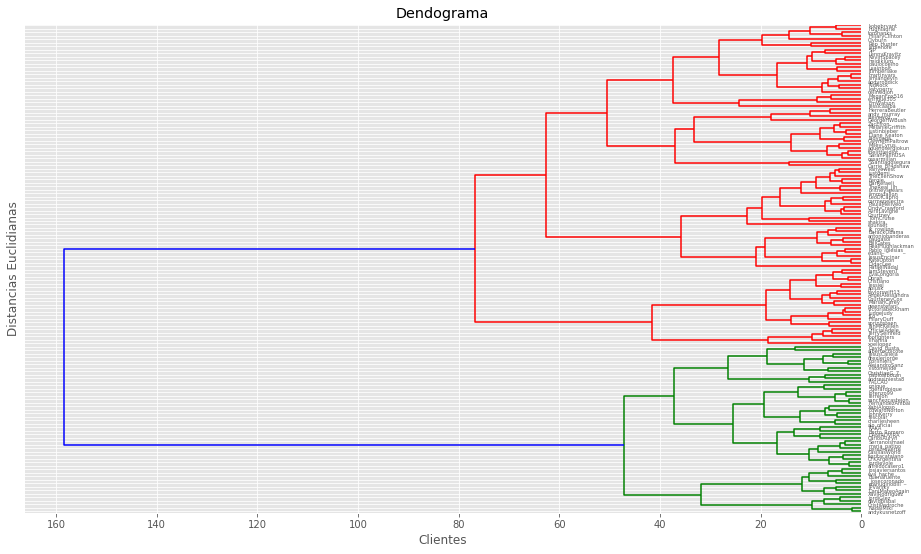

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), 
                            orientation='left', labels=X.index )

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

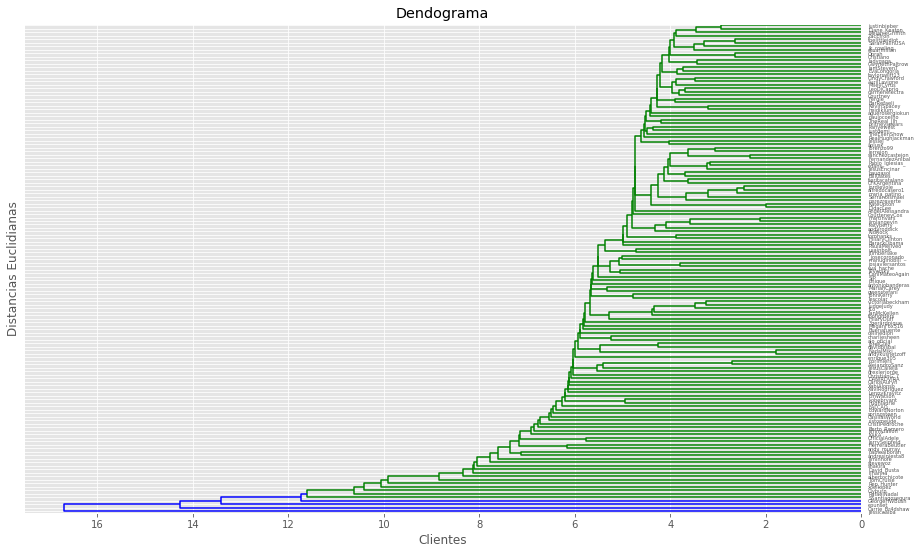

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X), 
                            orientation='left', labels=X.index )

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

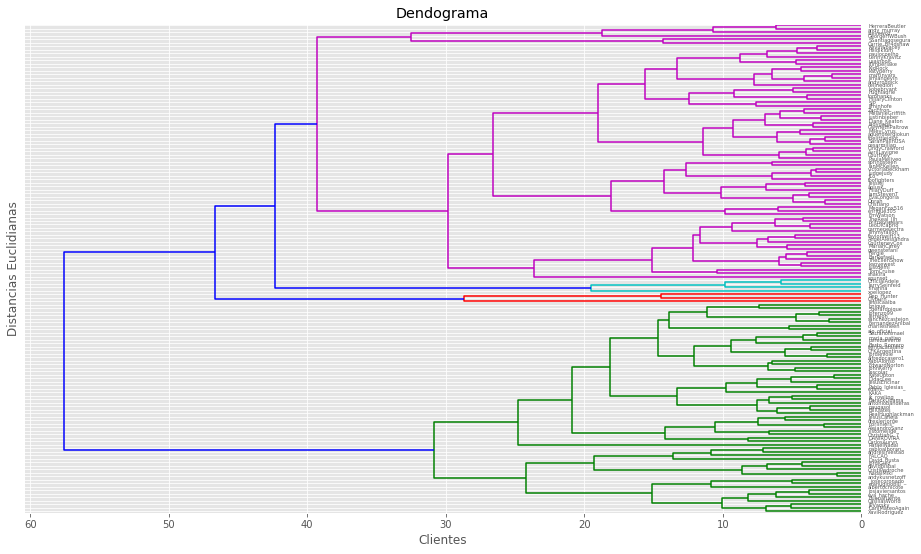

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'), 
                            orientation='left', labels=X.index )

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

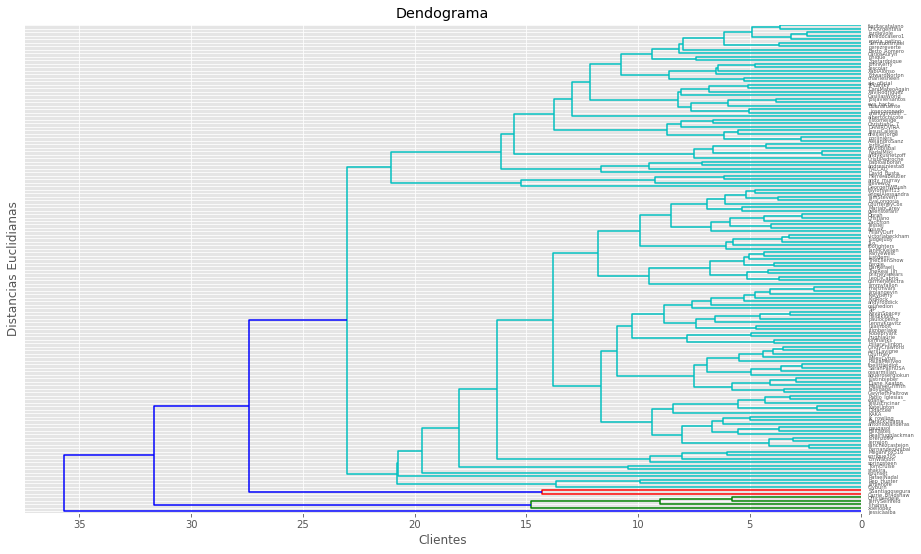

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='average'), 
                            orientation='left', labels=X.index )

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
df_userpersonality['ClusterAgglo'] = cluster.fit_predict(X)

In [10]:
df_userpersonality.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,ClusterAgglo
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,0
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,4
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,0
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,0
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,0


In [11]:
df_userpersonality['ClusterAgglo'].value_counts()

0    48
3    29
1    24
2    22
4    17
Name: ClusterAgglo, dtype: int64